 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [144]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [33]:
# Reading whale returns
whale_returns = Path('Resources/whale_returns.csv')
whale_returns_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
print(whale_returns_df.head())
whale_returns_df.describe(include='all')

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [9]:
# Count nulls
print(whale_returns_df.isnull().sum())

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [52]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [36]:
# Reading algo_returns 
algo_returns = Path('Resources/algo_returns.csv')
algo_returns_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
print(algo_returns_df.head())
algo_returns_df.describe(include='all')

              Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN


,Algo 1,Algo 2
count,1241.000000,1235.000000
mean,0.000667,0.000341
std,0.007972,0.008466
min,-0.030951,-0.036937
25%,-0.003238,-0.003733
50%,0.000135,0.000581
75%,0.003978,0.005194
max,0.098246,0.083734


In [23]:
# Count nulls
print(algo_returns_df.isnull().sum())

Algo 1    0
Algo 2    6
dtype: int64


In [24]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [57]:
# Reading S&P 500 Closing Prices
sp500_history = Path('Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)
print(sp500_df.describe(include='all'))
sp500_df.head()

           Close
count       1649
unique      1639
top     $2373.47
freq           2


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [30]:
# Check Data Types
sp500_df.sort_values('Date', inplace=True)
sp500_df.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [39]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '').astype(float)
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [40]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
print(sp500_returns.head())

               Close
Date                
2019-04-23       NaN
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279


In [42]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [45]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns={'Close':'SP500_RET'}, inplace=True)
sp500_returns.head()


,SP500_RET
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [69]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combine_daily_returns = pd.concat([whale_returns_df, algo_returns_df, sp500_returns], axis = 'columns', join ='inner')
print(combine_daily_returns.isnull().sum())
combine_daily_returns.head()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500_RET                      0
dtype: int64


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_RET
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

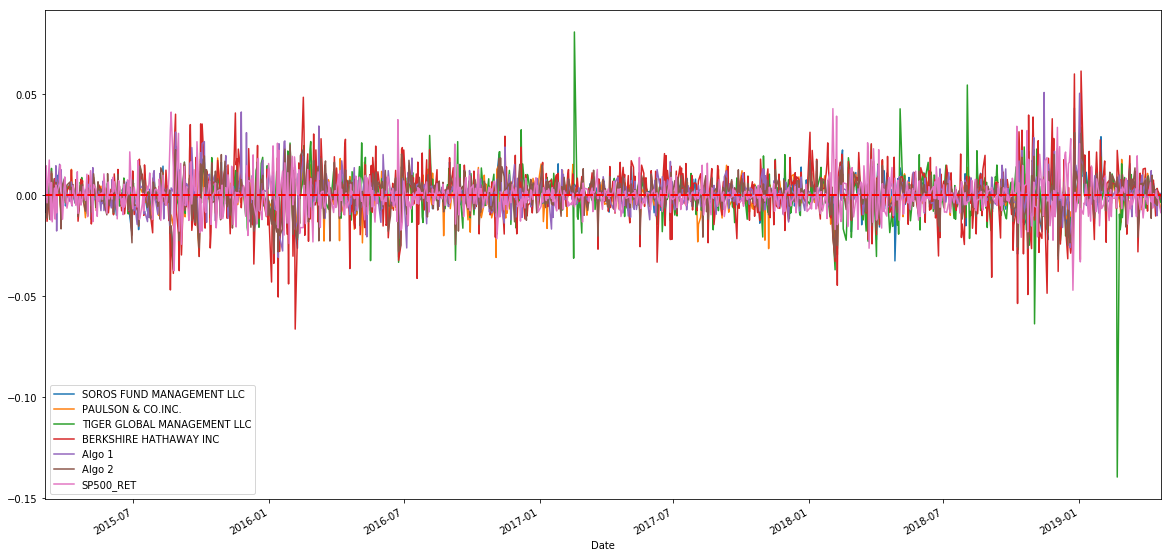

In [293]:
# Plot daily returns of all portfolios
ax = combine_daily_returns['SOROS FUND MANAGEMENT LLC'].plot(figsize=(20,10), legend = 'True')
combine_daily_returns['PAULSON & CO.INC. '].plot(legend = 'True', ax=ax)
combine_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].plot(legend = 'True', ax=ax)
combine_daily_returns['BERKSHIRE HATHAWAY INC'].plot(legend = 'True', ax=ax)
combine_daily_returns['Algo 1'].plot(legend = 'True', ax=ax)
combine_daily_returns['Algo 2'].plot(legend = 'True', ax=ax)
combine_daily_returns['SP500_RET'].plot(legend = 'True', ax=ax)
ax.axhline(y=0, color='r', linestyle='--', lw=2)

#### Calculate and Plot cumulative returns.

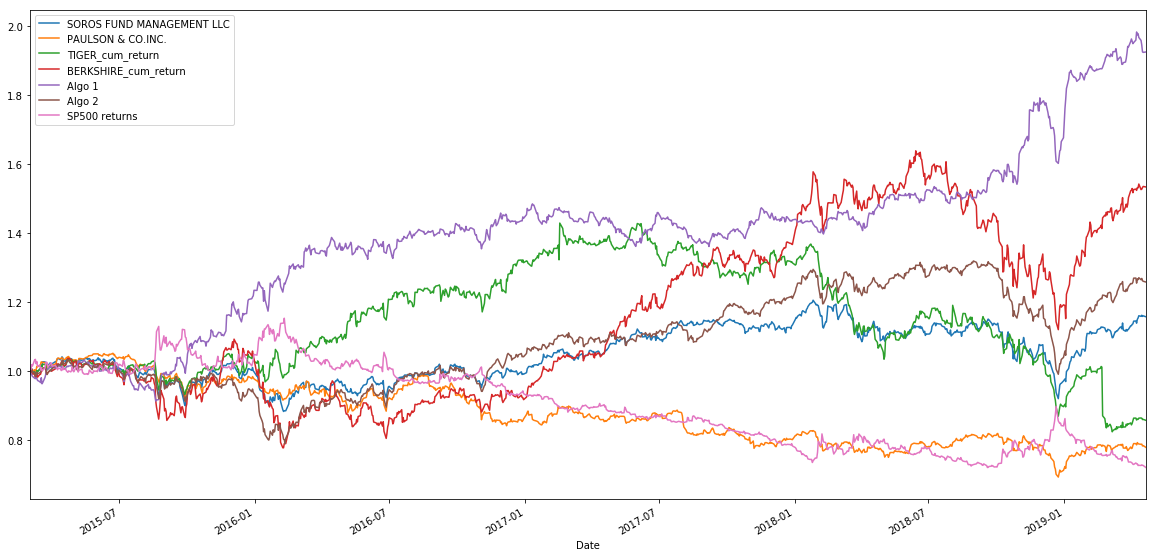

In [99]:
# Calculate cumulative returns of all portfolios
SOROS_FUND_cum_return = (1 + combine_daily_returns['SOROS FUND MANAGEMENT LLC']).cumprod()
PAULSON_cum_return = (1+combine_daily_returns['PAULSON & CO.INC. ']).cumprod()
TIGER_cum_return = (1+combine_daily_returns['TIGER GLOBAL MANAGEMENT LLC']).cumprod()
BERKSHIRE_cum_return = (1+combine_daily_returns['BERKSHIRE HATHAWAY INC']).cumprod()
Algo1_cum_return = (1+combine_daily_returns['Algo 1']).cumprod()
Algo2_cum_return = (1+combine_daily_returns['Algo 2']).cumprod()
sp500_cum_return =(1+combine_daily_returns['SP500_RET']).cumprod()


# Plot cumulative returns
ax = SOROS_FUND_cum_return.plot(figsize=(20,10))
PAULSON_cum_return.plot(ax=ax)
TIGER_cum_return.plot(ax=ax)
BERKSHIRE_cum_return.plot(ax=ax)
Algo1_cum_return.plot(ax=ax)
Algo2_cum_return.plot(ax=ax)
sp500_cum_return.plot(ax=ax)

ax.legend(['SOROS FUND MANAGEMENT LLC', 
           'PAULSON & CO.INC. ', 
           'TIGER_cum_return',
           'BERKSHIRE_cum_return',
           'Algo 1', 
           'Algo 2', 
           'SP500 returns'])


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


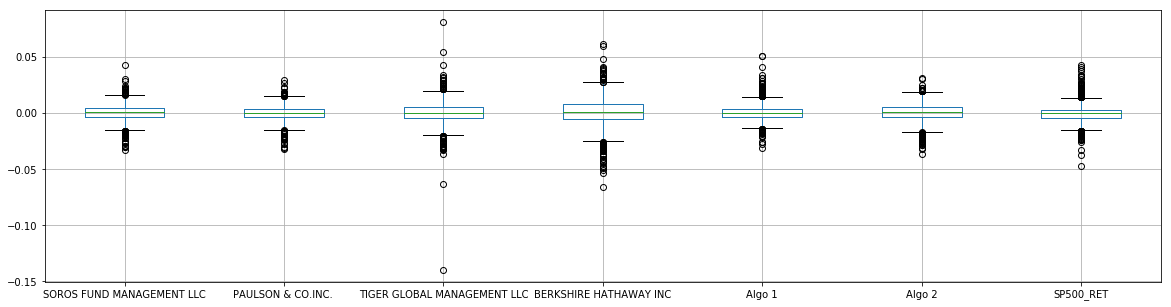

In [104]:
# Box plot to visually show risk
box_plot = combine_daily_returns.boxplot(figsize=(20,5))

### Calculate Standard Deviations

In [110]:
# Calculate the daily standard deviations of all portfolios
combine_daily_returns.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500_RET                      0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [138]:
# Calculate  the daily standard deviation of S&P 500
sp500_volatility = combine_daily_returns['SP500_RET'].std()
print('SP500 volatilty: ', sp500_volatility)

# Determine which portfolios are riskier than the S&P 500
port_volatilities = combine_daily_returns.std()[['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC',  'Algo 1', 'Algo 2']]

for index in port_volatilities.index: 
    if port_volatilities[index] > sp500_volatility:  
        print(f'{index} is riskier than SP500')
        

SP500 volatilty:  0.00858688974707399
TIGER GLOBAL MANAGEMENT LLC is riskier than SP500
BERKSHIRE HATHAWAY INC is riskier than SP500


### Calculate the Annualized Standard Deviation

In [139]:
# Calculate the annualized standard deviation (252 trading days)
annualized_volatilities = combine_daily_returns.std() * np.sqrt(252)
annualized_volatilities

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500_RET                      0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

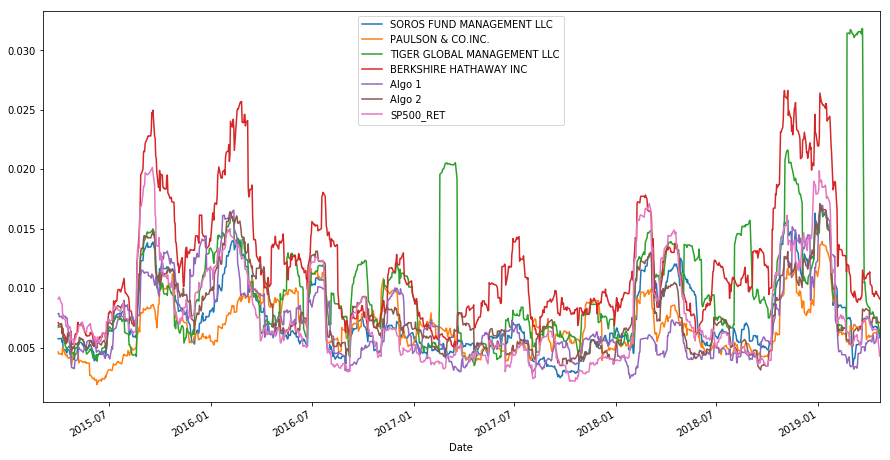

In [294]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfilios_stddev = combine_daily_returns.rolling(window=21).std()
portfilios_stddev
# Plot the rolling standard deviation
portfilios_stddev.plot(figsize = (15,8))

### Calculate and plot the correlation

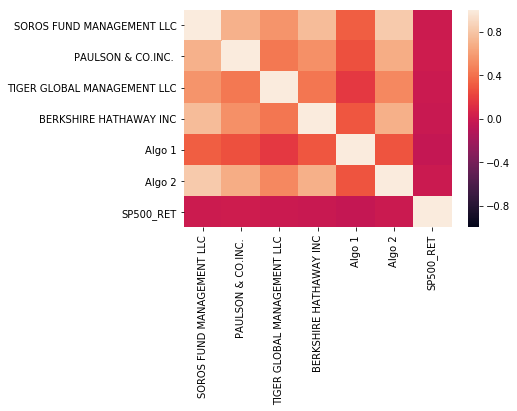

In [146]:
# Calculate the correlation
correlation = combine_daily_returns.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

 Algo_1 covariance: -2.2230425517155273e-06
 SP500 Variance: 7.373467552840441e-05
 Algo_1 beta: -0.030149214542337772


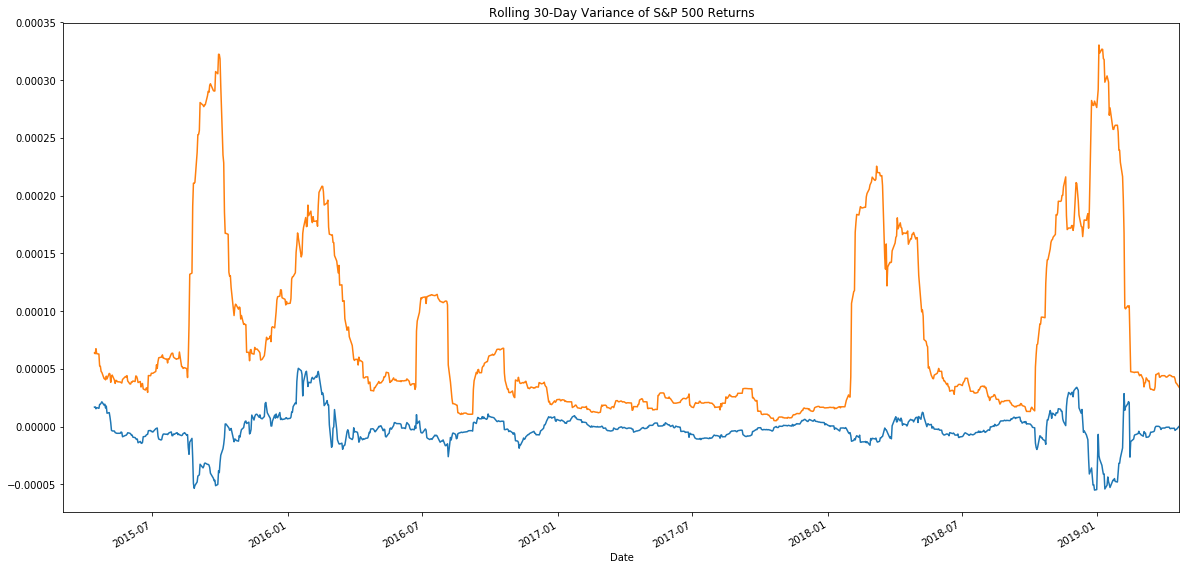

In [163]:
# Calculate covariance of a single portfolio
algo1_cov = combine_daily_returns['Algo 1'].cov(combine_daily_returns['SP500_RET'])
print(f' Algo_1 covariance: {algo1_cov}')
# Calculate variance of S&P 500
SP_variance = combine_daily_returns['SP500_RET'].var()
print(f' SP500 Variance: {SP_variance}')
# Computing beta
algo1_beta = algo1_cov / SP_variance
print(f' Algo_1 beta: {algo1_beta}')

# Plot beta trend
algo1_roll_cov = combine_daily_returns['Algo 1'].rolling(window=30).cov(combine_daily_returns['SP500_RET'])
algo1_roll_cov.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Algo_1 Returns vs. S&P 500 Returns')
SP500_rolling_var = combine_daily_returns['SP500_RET'].rolling(window=30).var()
SP500_rolling_var.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns') 

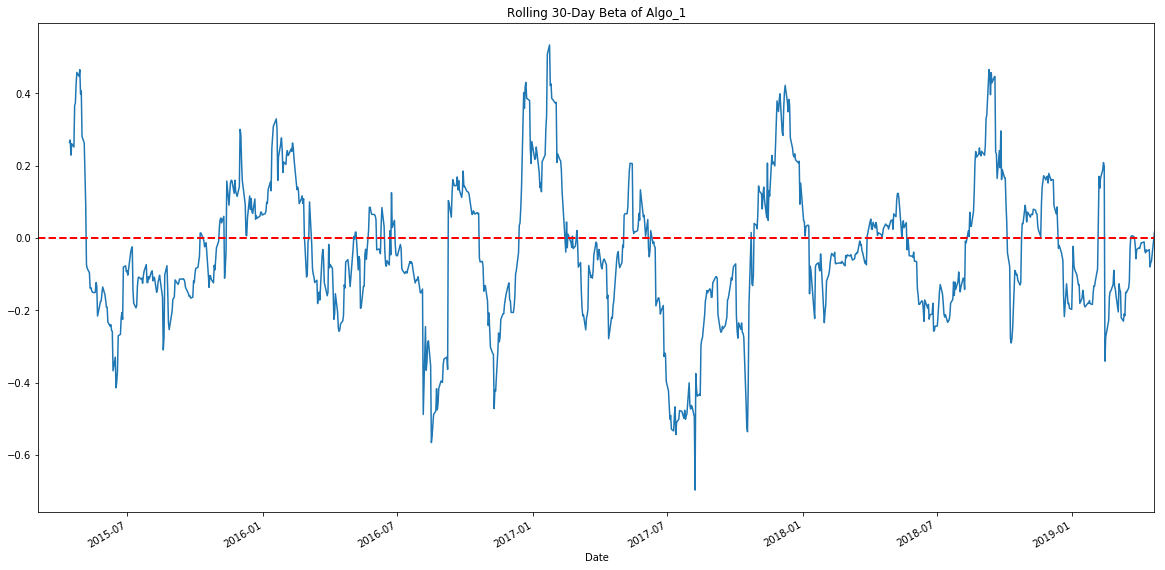

In [166]:
# Calculate 30-day rolling beta of Algo_1 and plot the data
algo1_rolling_beta = algo1_roll_cov / SP500_rolling_var
ax = algo1_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo_1')
ax.axhline(y=0, color='r', linestyle='--', lw=2)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

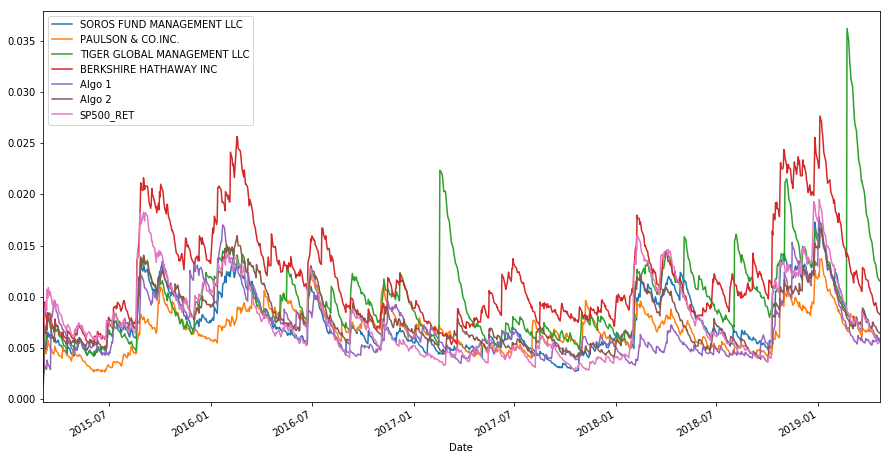

In [295]:
# Use `ewm` to calculate the rolling window
portfilios_stddev_ewm = combine_daily_returns.ewm(span=30).std()
portfilios_stddev_ewm
# Plot the rolling standard deviation
portfilios_stddev_ewm.plot(figsize=(15,8))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [170]:
# Annualized Sharpe Ratios
sharpe_ratios = (combine_daily_returns.mean() * 252) / (combine_daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500_RET                     -0.518582
dtype: float64

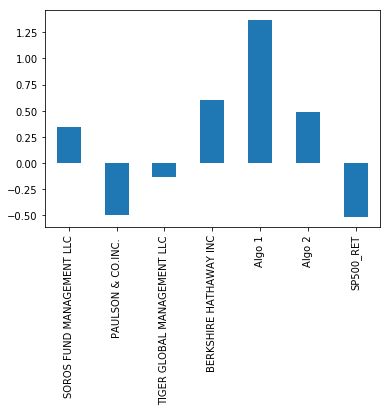

In [171]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [225]:
# Reading data from 1st stock
goog_path = Path('Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.rename(columns = {'NOCP':'GOOG'}, inplace=True)
goog_df.rename_axis(index = {'Trade DATE':'Date'}, inplace=True)
# goog_df.drop(columns=['Symbol'], inplace=True)
print(goog_df.head())
goog_df.isnull().sum()

           Symbol     GOOG
Date                      
2019-05-09   GOOG  1162.38
2019-05-08   GOOG  1166.27
2019-05-07   GOOG  1174.10
2019-05-06   GOOG  1189.39
2019-05-03   GOOG  1185.40


Symbol    0
GOOG      0
dtype: int64

In [226]:
# Reading data from 2nd stock
aapl_path = Path('Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.rename(columns = {'NOCP':'AAPL'}, inplace=True)
aapl_df.rename_axis(index = {'Trade DATE':'Date'}, inplace=True)
# aapl_df.drop(columns=['Symbol'], inplace=True)
print(aapl_df.head())
aapl_df.isnull().sum()

           Symbol    AAPL
Date                     
2019-05-09   AAPL  200.72
2019-05-08   AAPL  202.90
2019-05-07   AAPL  202.86
2019-05-06   AAPL  208.48
2019-05-03   AAPL  211.75


Symbol    0
AAPL      0
dtype: int64

In [227]:
# Reading data from 3rd stock
cost_path = Path('Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.rename(columns = {'NOCP':'COST'}, inplace=True)
cost_df.rename_axis(index = {'Trade DATE':'Date'}, inplace=True)
# cost_df.drop(columns=['Symbol'], inplace=True)
print(cost_df.head())
cost_df.isnull().sum()

           Symbol    COST
Date                     
2019-05-09   COST  243.47
2019-05-08   COST  241.34
2019-05-07   COST  240.18
2019-05-06   COST  244.23
2019-05-03   COST  244.62


Symbol    0
COST      0
dtype: int64

In [228]:
# Combine all stocks in a single DataFrame
custom_portfolio =pd.concat([goog_df, aapl_df, cost_df], axis='columns', join = 'inner')
custom_portfolio.sort_values(by='Date', inplace=True)
custom_portfolio.head()

,Symbol,GOOG,Symbol,AAPL,Symbol,COST
Date,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60


In [ ]:
# Reset Date index


In [229]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio.drop('Symbol', axis=1, inplace=True)
custom_portfolio.head()

,GOOG,AAPL,COST
Date,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [230]:
# Calculate daily returns
custom_portfolio_returns= custom_portfolio.pct_change()
# Drop NAs
custom_portfolio_returns.dropna(inplace=True)
# Display sample data
custom_portfolio_returns.head()

,GOOG,AAPL,COST
Date,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [267]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
final_portfolio_returns = custom_portfolio_returns.dot(weights)
final_portfolio_returns = final_portfolio_returns.to_frame('Custom_Port_Ret')
# Display sample data
print(final_portfolio_returns.head())

            Custom_Port_Ret
Date                       
2018-05-14         0.000015
2018-05-15        -0.010064
2018-05-16         0.009403
2018-05-17        -0.001595
2018-05-18        -0.006061


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [268]:
# Join your returns DataFrame to the original returns DataFrame
all_daily_returns = pd.concat([combine_daily_returns,final_portfolio_returns], axis='columns', join='inner')
all_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500_RET                      0
Custom_Port_Ret                0
dtype: int64

In [269]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_daily_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [270]:
# Calculate the annualized `std`
all_daily_returns.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
SP500_RET                      0.152469
Custom_Port_Ret                0.211627
dtype: float64

### Calculate and plot rolling `std` with 21-day window

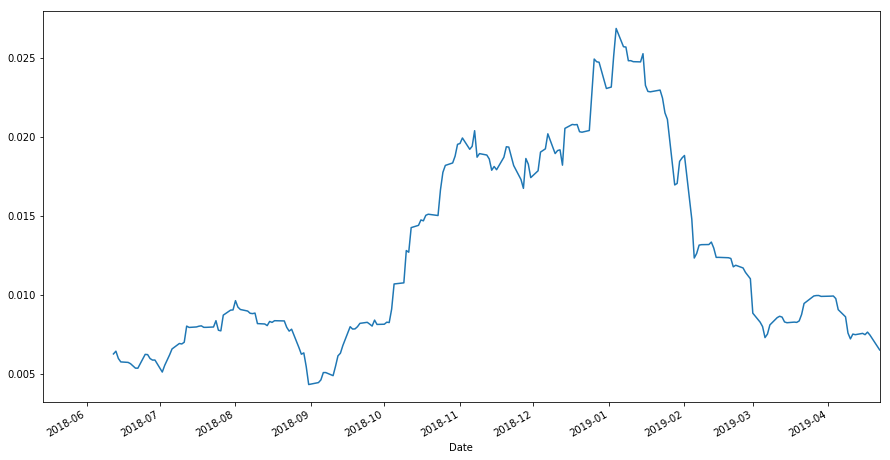

In [274]:
# Calculate rolling standard deviation
Custom_rolling_std = all_daily_returns['Custom_Port_Ret'].rolling(window=21).std()
# Plot rolling standard deviation
Custom_rolling_std.plot(figsize =(15, 8))

### Calculate and plot the correlation

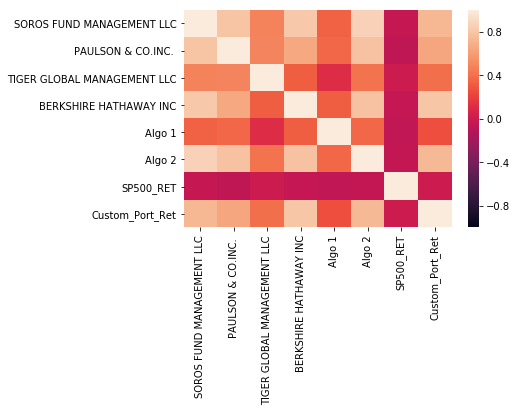

In [275]:
# Calculate and plot the correlation
corr = all_daily_returns.corr()
corr 
# Display de correlation matrix
sns.heatmap(corr, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

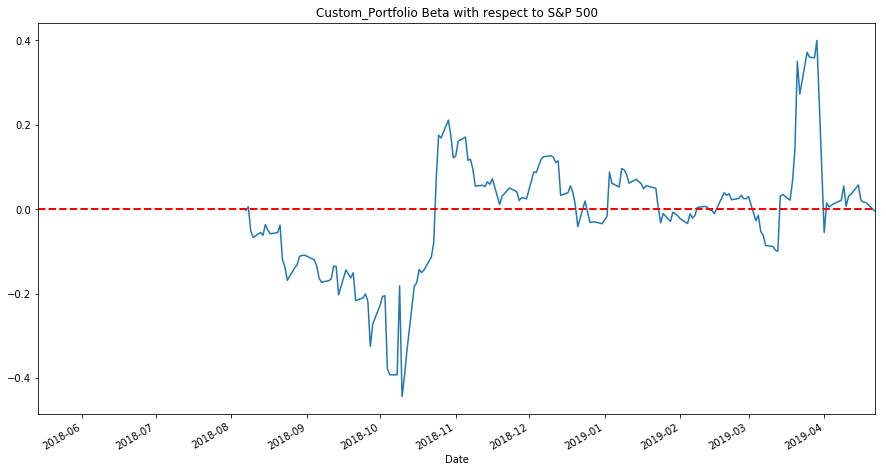

In [288]:
# Calculate and plot Beta
Cust_port_cov = all_daily_returns['Custom_Port_Ret'].rolling(window=60).cov(all_daily_returns['SP500_RET'])
# Cust_port_cov.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Custom_Portfolio Returns vs. S&P 500 Returns')
SP500_rolling_var = all_daily_returns['SP500_RET'].rolling(window=60).var()
# SP500_rolling_var.plot(figsize=(20, 10), title='Rolling 60-Day Variance of S&P 500 Returns') 

Cust_port_beta = Cust_port_cov /SP500_rolling_var
ax = Cust_port_beta.plot(figsize=(15,8), title='Custom_Portfolio Beta with respect to S&P 500')
ax.axhline(y=0, color='r', linestyle='--', lw=2)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [289]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_2 = (all_daily_returns.mean() * 252) / (all_daily_returns.std() * np.sqrt(252))
sharpe_ratios_2

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
SP500_RET                     -0.427676
Custom_Port_Ret                0.876152
dtype: float64

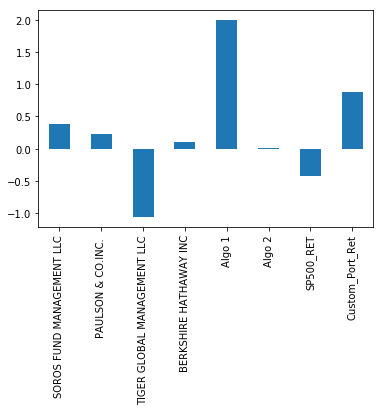

In [290]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

The Custom portfolio of Google, Apple and Costco performed better tha S&P 500 in the gieven period (last year - 2018 to 2019) 
Cutom potfolio's sharp ratio is at 0.88 highe than all other profolios except the Algo_1 portfolio. 
Overall Algo 1 portfolio emerged as bes 